In [ ]:
!nvidia-smi

Mon Feb 28 13:25:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

test_path = "/content/drive/MyDrive/AIProject/Test"
train_path = "/content/drive/MyDrive/AIProject/Train"


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/AIProject/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 96,
                                                 class_mode = 'categorical')

Found 3202 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/AIProject/Test",
                                            target_size = (224, 224),
                                            batch_size = 96,
                                            class_mode = 'categorical')

Found 595 images belonging to 4 classes.


In [ ]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob("/content/drive/MyDrive/AIProject/Train/*")

In [ ]:
# our layers
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
34/34 [==============================] - 908s 26s/step - loss: 4.6321 - accuracy: 0.3392 - val_loss: 1.5703 - val_accuracy: 0.5345
Epoch 2/20
34/34 [==============================] - 79s 2s/step - loss: 1.0135 - accuracy: 0.6043 - val_loss: 0.7502 - val_accuracy: 0.7681
Epoch 3/20
34/34 [==============================] - 79s 2s/step - loss: 0.6664 - accuracy: 0.7545 - val_loss: 0.3739 - val_accuracy: 0.8403
Epoch 4/20
34/34 [==============================] - 79s 2s/step - loss: 0.5025 - accuracy: 0.8220 - val_loss: 0.3901 - val_accuracy: 0.8891
Epoch 5/20
34/34 [==============================] - 80s 2s/step - loss: 0.4222 - accuracy: 0.8666 - val_loss: 0.2681 - val_accuracy: 0.9261
Epoch 6/20
34/34 [==============================] - 80s 2s/step - loss: 0.3513 - accuracy: 0.8998 - val_loss: 0.2246 - val_accuracy: 0.9479
Epoch 7/20
34/34 [==============================] - 80s 2s/step - loss: 0.3392 - accuracy: 0.9004 - val_loss: 0.2501 - val_accuracy: 0.9227
Epoch 8/20
34/34 [

In [ ]:
import matplotlib.pyplot as plt

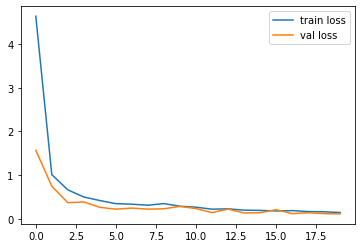

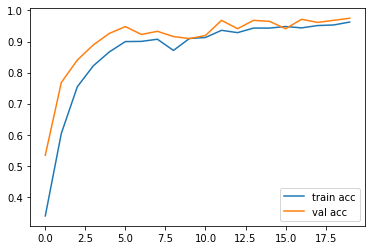

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.1277070e-06, 1.7526810e-09, 1.9751549e-05, 9.9997103e-01],
       [1.5780456e-08, 7.6649294e-06, 9.9992669e-01, 6.5636224e-05],
       [1.2964462e-06, 6.3203966e-06, 9.9999118e-01, 1.1383536e-06],
       ...,
       [4.7304525e-04, 7.1674031e-06, 4.1105724e-03, 9.9540919e-01],
       [3.6260090e-07, 3.7646341e-06, 9.9888164e-01, 1.1142207e-03],
       [1.7832218e-03, 2.2085058e-02, 9.7471219e-01, 1.4195123e-03]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 2, 2, 3, 1, 2, 0, 2, 0, 3, 0, 3, 3, 2, 0, 2, 2, 1, 2, 2, 2, 3,
       3, 1, 3, 0, 1, 0, 0, 3, 2, 3, 1, 1, 0, 1, 0, 1, 3, 3, 3, 3, 3, 2,
       0, 2, 3, 0, 0, 0, 2, 2, 0, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0,
       2, 1, 0, 2, 3, 2, 0, 0, 3, 0, 1, 0, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3,
       0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 2, 0, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 1, 0, 1, 2, 2, 0, 2, 0, 3, 0,
       2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 3, 3, 2, 0, 1, 0, 3, 2, 3,
       2, 2, 0, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 2, 1, 3, 0, 3, 1, 0, 2,
       0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 3, 0, 3, 3, 0, 3, 2, 2, 0, 1, 2, 3,
       2, 0, 0, 1, 0, 3, 0, 2, 1, 1, 2, 2, 3, 3, 0, 3, 2, 3, 0, 0, 2, 3,
       1, 0, 2, 3, 3, 0, 2, 2, 3, 0, 3, 1, 0, 1, 3, 0, 3, 2, 1, 2, 0, 0,
       3, 3, 1, 0, 0, 2, 3, 0, 1, 3, 2, 0, 2, 0, 2, 2, 0, 1, 0, 3, 3, 3,
       1, 3, 0, 2, 3, 1, 3, 2, 3, 3, 0, 3, 0, 3, 0, 1, 3, 0, 1, 0, 0, 2,
       0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 3, 2, 3, 1, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')